# Introduction

Dataset used to make a model is found here: 

https://www.kaggle.com/kazanova/sentiment140


In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [2]:
col_names = ['sentiment', 'ids', 'date', 'flag', 'user', 'text']
col_taken = ['sentiment', 'text']

df = pd.read_csv('Twit_sentiment.csv', encoding='ISO-8859-1', names=col_names, usecols=col_taken)

df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [3]:
print('Few Samples: \n ')
for i in range(1, 6):
    print('Good: \t', df['text'].iloc[-i], '\n', 
         'Bad: \t', df['text'].iloc[i], '\n')

Few Samples: 
 
Good: 	 happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H  
 Bad: 	 is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! 

Good: 	 Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur  
 Bad: 	 @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds 

Good: 	 Are you ready for your MoJo Makeover? Ask me for details  
 Bad: 	 my whole body feels itchy and like its on fire  

Good: 	 TheWDB.com - Very cool to hear old Walt interviews!  â« http://blip.fm/~8bmta 
 Bad: 	 @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  

Good: 	 Just woke up. Having no school is the best feeling ever  
 Bad: 	 @Kwesidei not the whole crew  



# Data clearning 

#### Stemming 

What is it?



In [4]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    
    tokens = []
    for token in text.split():
        if token not in stop_words:
            tokens.append(stemmer.stem(token))
    return ' '.join(tokens)

In [5]:
print('Total number of stop words removed: \t', len(stop_words))

Total number of stop words removed: 	 179


In [6]:
print('Few Samples (cleaned): \n ')
for i in range(1, 6):
    print('Good: \t', df['text'].iloc[-i], '\n', 
         'Bad: \t', df['text'].iloc[i], '\n')

Few Samples (cleaned): 
 
Good: 	 happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H  
 Bad: 	 is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! 

Good: 	 Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur  
 Bad: 	 @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds 

Good: 	 Are you ready for your MoJo Makeover? Ask me for details  
 Bad: 	 my whole body feels itchy and like its on fire  

Good: 	 TheWDB.com - Very cool to hear old Walt interviews!  â« http://blip.fm/~8bmta 
 Bad: 	 @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  

Good: 	 Just woke up. Having no school is the best feeling ever  
 Bad: 	 @Kwesidei not the whole crew  



# How many words are there in average in each tweet?

In [7]:
df['text'] = df['text'].apply(preprocess)

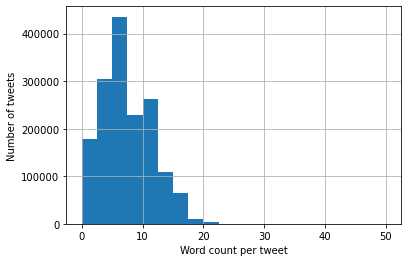

In [8]:
word_count = df['text'].str.split().str.len()
word_count.hist(bins=20)
plt.xlabel('Word count per tweet')
plt.ylabel('Number of tweets')
plt.show()

In [9]:
word_count.describe()

count    1.600000e+06
mean     7.209737e+00
std      4.051772e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      5.000000e+01
Name: text, dtype: float64

In [10]:
sum(word_count > 25)

215

There are very few tweets whose word count is greater than 35. We can assume them to be outlier. It is safer to not to include them in the train data and validation data. But it might be interesting to test the model finally on them. So we make a new dataframe with those long tweets and test our model later on them. 

In [11]:
df_long = df[word_count > 25]
df_long

,sentiment,text
2026,0,need 2 get ass gear wana go away 24 6 bt nt su...
3318,0,b c h tho th l gi cu c r nh v n c n nh c nh p ...
5626,0,mai thi communic system ch c h c c ch n h ch c...
12780,0,em th ng b n ng nh ng b n ko h tr wifi vn l ch...
24320,0,c h c b r th ng starr l c u nh r tr ng n l lo ...
...,...,...
1571081,4,tr n ng nh heo hy v ng chi u nay ko tr l th h ...
1573989,4,updat nh h nh cleverlearn l l p 20 6 full nh n...
1583033,4,ch nh nh c tweetdeck th l n tr c c gi c n v vi...
1585335,4,n u ng ng os window c th l c 1 usd v l n nh tr...


And we redefine the tweet data removing those outliers.

In [12]:
df = df[word_count < 25]

df['sentiment'].value_counts()

0    799846
4    799837
Name: sentiment, dtype: int64

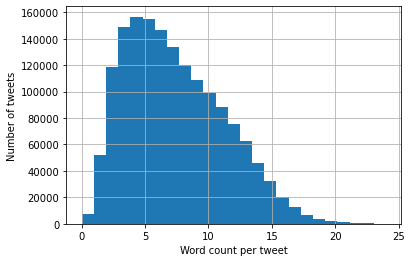

In [13]:
word_count = df['text'].str.split().str.len()
word_count.hist(bins=25)
plt.xlabel('Word count per tweet')
plt.ylabel('Number of tweets')
plt.show()

We choose 25 bins in the histogram because 25 is the maximum word count in our tweet data. It looks like most of the words are 4 to 5 words. Please remind that we have already removed the stopwords from the tweet. With the stop words these number would certainly be higher. 

In [14]:
word_count.describe()

count    1.599683e+06
mean     7.205715e+00
std      4.041844e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      2.400000e+01
Name: text, dtype: float64

# Vizualize the top used words to get an idea of how many words to keep in the word vector. 

- Length of the word vector at max can be equal to the total number of words in english dictionary. 1000 might be the good vector to consider. But check it. 

- If the plan is to use in other text data the words appearing in tweet might not the be the good indicator of the most frequent words in other form of texts, eg. news, book etc. 


- top good words and top bad words in wordcloud 

In [15]:
word_count_stacked = df['text'].str.split(expand=True).stack().value_counts()
print('Total number of words in the dataset: \t', len(word_count))

Total number of words in the dataset: 	 1599683


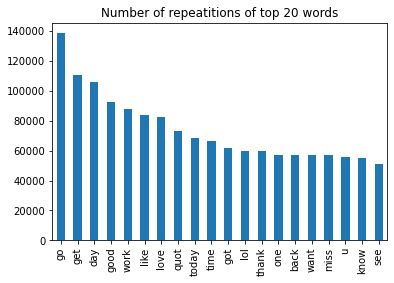

In [16]:
word_count_stacked.head(20).plot.bar()
plt.title('Number of repeatitions of top 20 words')
plt.show()

In [17]:
'go' in stop_words

False

So form the bar chart we see that the most repeated word (excluding stopwords) in the dataset is 'go'. 

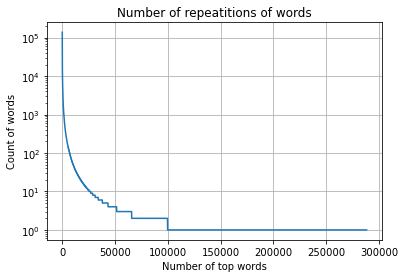

In [18]:
arr = word_count_stacked.values

plt.plot(arr)
plt.yscale('log')
plt.xlabel('Number of top words')
plt.ylabel('Count of words')
plt.title('Number of repeatitions of words')
plt.grid()

In [19]:
print('After top 100000, are the words repeated only once? \t ', \
      (arr[100000:] == 1).all())

After top 100000, are the words repeated only once? 	  True


From this plot it is seen that bottom 100000 words appreas just once in the dataset. It is safe to not to use those words in the data. But we can do better than this. We may need few top words as least repeated word is least likely to tell anything about the data. Lets look closer. 

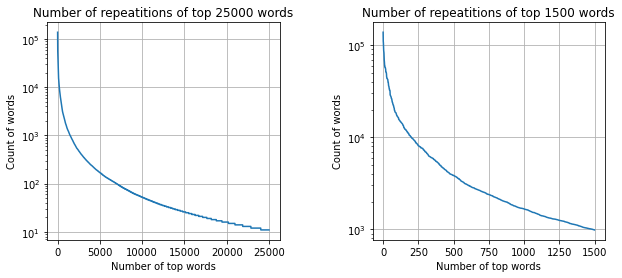

In [20]:
fig = plt.figure(figsize=(10, 4))

ax = fig.add_subplot(1, 2, 1)
plt.plot(arr[:25000])
plt.yscale('log')
plt.xlabel('Number of top words')
plt.ylabel('Count of words')
plt.title('Number of repeatitions of top 25000 words')
plt.grid()

ax = fig.add_subplot(1, 2, 2)
plt.plot(arr[:1500])
plt.yscale('log')
plt.xlabel('Number of top words')
plt.ylabel('Count of words')
plt.title('Number of repeatitions of top 1500 words')
plt.grid()

fig.subplots_adjust(wspace = 0.4)

If we choose top 25000 words then the least repeated word in the dataset apprears approximately 10 times. Top top 1500 words repeat at least 1000 times and top 500 words repeats at least 5000 times. There are 1600000 samples. So repeating a word 16000 times means that word appearing in 1% of the sample. Therefore, if we choose top 500 words the least repeated word appears in 0.3% of the sample and if we choose top 2000 words the least repeated word appears in 0.05% of the sample. To imphesize least repeated word of top 2000 word appear only once in each 2000 tweet. So top 1000 or 2000 sample must be enough.

# What are the top positive and negative words?

In [21]:
from wordcloud import WordCloud

In [22]:
text_positive = df[df['sentiment'] == 4]['text']
text_negative = df[df['sentiment'] == 0]['text']

word_count_positive = text_positive.str.split(expand=True).stack().value_counts()
word_count_negative = text_negative.str.split(expand=True).stack().value_counts()

In [23]:
cloud = WordCloud(max_words=100, 
                  width=200, 
                  height=200,
                  stopwords=stop_words,
                  colormap='magma',
                  background_color='white')

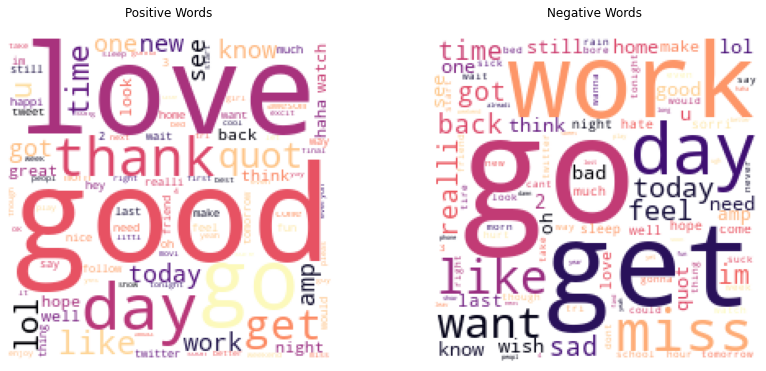

In [24]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
wc_positive = cloud.generate_from_frequencies(word_count_positive)
plt.imshow(wc_positive)
plt.axis('off')
plt.title('Positive Words \n')

ax = fig.add_subplot(1, 2, 2)
wc_negative = cloud.generate_from_frequencies(word_count_negative)
plt.imshow(wc_negative)
plt.axis('off')
plt.title('Negative Words \n')

plt.show()

#### What is 'Quot' and 'amp'?

It seems to be twitter text that is repeated in most of the tweet. 

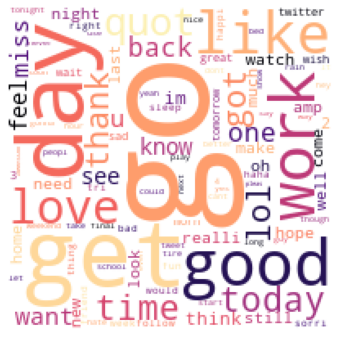

In [26]:
fig = plt.figure(figsize=(6, 6))
wc_total = cloud.generate_from_frequencies(word_count_stacked)
plt.imshow(wc_total)
plt.axis('off')
plt.show()

# Exporting CSV 

In [27]:
df.to_csv('Tweet_sentiment_clean.csv', index=False)

# Future directions 

- May be it is good idea to remove the words which are equally significant in good and bad sentiment data. Need to find a systematic and quantitative way to make a decision about it. 